# Stability of forward/backward Euler scheme

Consider the ODE
$$
y' = -100y, \qquad t \ge 0
$$
with initial condition
$$
y(0) = 1
$$
The exact solution is
$$
y(t) = \exp(-100 t)
$$

In [40]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
from matplotlib import pyplot as plt

Right hand side function and exact solution

In [41]:
def f(t,y):
    return -100.0*y

def yexact(t):
    return np.exp(-100.0*t)

t0, y0, T = 0.0, 1.0, 0.2

## Forward Euler

This implements Euler method
$$
y_n = y_{n-1} + h f(t_{n-1},y_{n-1}) = (1 - 100 h) y_{n-1}
$$

In [42]:
def feuler(t0,T,y0,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    y[0] = y0
    t[0] = t0
    for n in range(1,N):
        y[n] = y[n-1] + h*f(t[n-1],y[n-1])
        t[n] = t[n-1] + h
    te = np.linspace(t0,T,100)
    ye = yexact(te)
    plt.plot(t,y,te,ye,'--')
    plt.legend(('Numerical','Exact'))
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Step size = ' + str(h));

We first try a step size slightly larger than the stability limit.

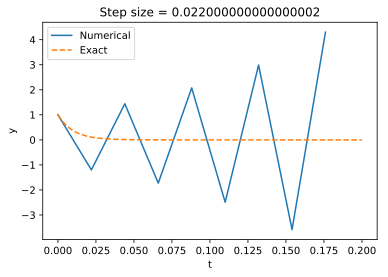

In [43]:
h  = 1.1*2.0/100
feuler(t0,T,y0,h)

Now we try the maximum allowed time step.

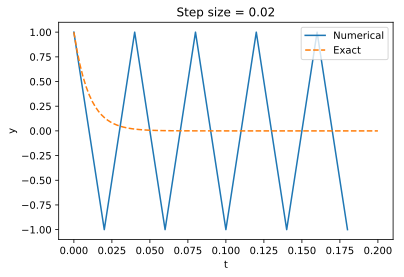

In [44]:
h  = 2.0/100
feuler(t0,T,y0,h)

The solution is oscillating between +1 and -1. Next we reduce $h$ by a small amount.

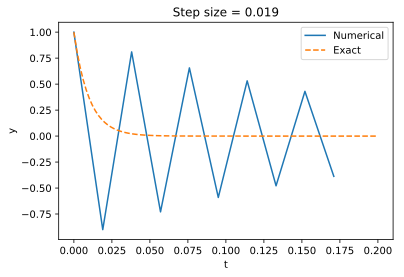

In [45]:
h  = 0.95*2.0/100
feuler(t0,T,y0,h)

Now the solution is decaying but in an oscillatory manner. To get monotonic decay, we need to use $h < \frac{1}{100}$.

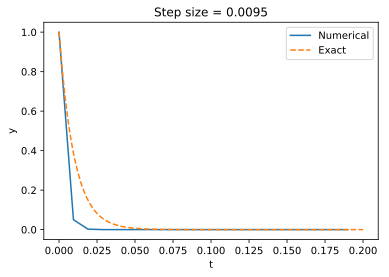

In [46]:
h  = 0.95*1.0/100
feuler(t0,T,y0,h)

## Backward Euler

The scheme is given by
$$
y_n = y_{n-1} + h f_n, \qquad y_n = \frac{y_{n-1}}{1+100h}
$$

In [47]:
def beuler(t0,T,y0,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    y[0] = y0
    t[0] = t0
    for n in range(1,N):
        y[n] = y[n-1]/(1.0+100*h)
        t[n] = t[n-1] + h
    te = np.linspace(t0,T,100)
    ye = yexact(te)
    plt.plot(t,y,te,ye,'--')
    plt.legend(('Numerical','Exact'))
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Step size = ' + str(h));

This scheme should be stable for any step size.

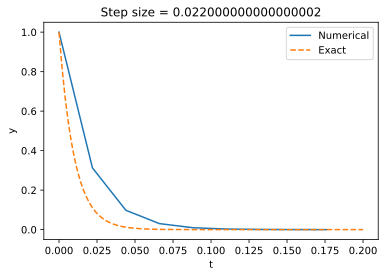

In [48]:
h  = 1.1*2.0/100
beuler(t0,T,y0,h)

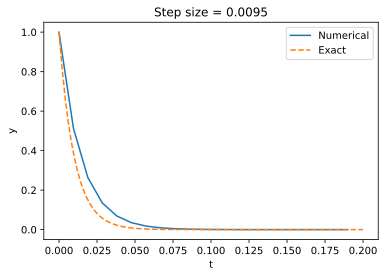

In [49]:
h  = 0.95*1.0/100
beuler(t0,T,y0,h)

## Trapezoidal method

The method is given by
$$
y_n = y_{n-1} + \frac{h}{2}(f_{n-1} + f_n) = y_{n-1} + \frac{h\lambda}{2}(y_{n-1} + y_n)
$$
$$
y_n = \frac{1 + \frac{h\lambda}{2}}{1 - \frac{h\lambda}{2}} y_{n-1}
$$

In [50]:
def cn(t0,T,y0,h):
    N = int((T-t0)/h)
    y = np.zeros(N)
    t = np.zeros(N)
    lam = -100.0
    coef = (1.0 + 0.5*h*lam)/(1.0 - 0.5*h*lam)
    y[0] = y0
    t[0] = t0
    for n in range(1,N):
        y[n] = coef*y[n-1]
        t[n] = t[n-1] + h
    te = np.linspace(t0,T,100)
    ye = yexact(te)
    plt.plot(t,y,te,ye,'--')
    plt.legend(('Numerical','Exact'))
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Step size = ' + str(h));

This scheme should be stable for any time step.

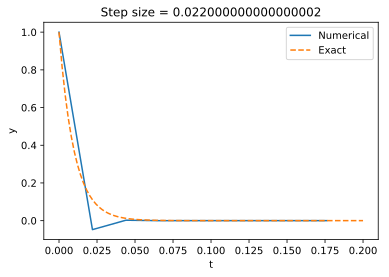

In [51]:
h  = 1.1*2.0/100
cn(t0,T,y0,h)

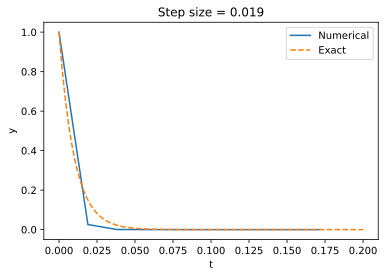

In [52]:
h  = 0.95*2.0/100
cn(t0,T,y0,h)